# Final Project

## Predict whether a mammogram mass is benign or malignant

I'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that I shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If I can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

I will be applying several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Many techniques also have "hyperparameters" that need to be tuned. Once I identify a promising approach, I will see if I can make it even better by tuning its hyperparameters. 

## Data Preparation

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

mamo_data = pd.read_csv("mammographic_masses.data.txt")
mamo_data.head()

C:\Users\Imahv\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Imahv\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
C:\Users\Imahv\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


I will add the appropriate column names (BI_RADS, age, shape, margin, density, and severity) and make sure I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN 

In [2]:
mamo_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
mamo_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
mamo_data = mamo_data.replace('?', np.nan) # replace '?' with NaN

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [4]:
mamo_data.describe() #describe() is used to get the statistical summary of the data

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


There are quite a few missing values in the data set. Before I drop every row that's missing data, let me make sure I don't bias my data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, I'd have to try and go back and fill that data in.

In [5]:
mamo_data.loc[(mamo_data['age'].isnull()) |
              (mamo_data['shape'].isnull()) |
              (mamo_data['margin'].isnull()) |
              (mamo_data['density'].isnull())]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [6]:
mamo_data.dropna = mamo_data.dropna(inplace=True) 
mamo_data.describe() #describe() is used to get the statistical summary of the data

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. By Creating an array that extracts only the feature data I want to work with (age, shape, margin, and density) and another array that contains the classes (severity). I'll also need an array of the feature name labels.

In [7]:
X = mamo_data[['age', 'shape', 'margin', 'density']].values  # X is the independent variable
y = mamo_data['severity'].values # y is the dependent variable
feature_names = ["age", "shape", "margin", "density", "severity"] #create array of feature names labelling the columns

y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

Some of my models require the input data to be normalized and I will use preprocessing.StandardScaler() for normalization. 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalised_data = scaler.fit_transform(X) # normalise the data

normalised_data

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

## Decision Trees

I start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Now create a DecisionTreeClassifier and fit it to my training data.

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42) # create a decision tree classifier
clf.fit(X_train, y_train) # train the classifier

DecisionTreeClassifier(random_state=42)

Display the resulting decision tree.

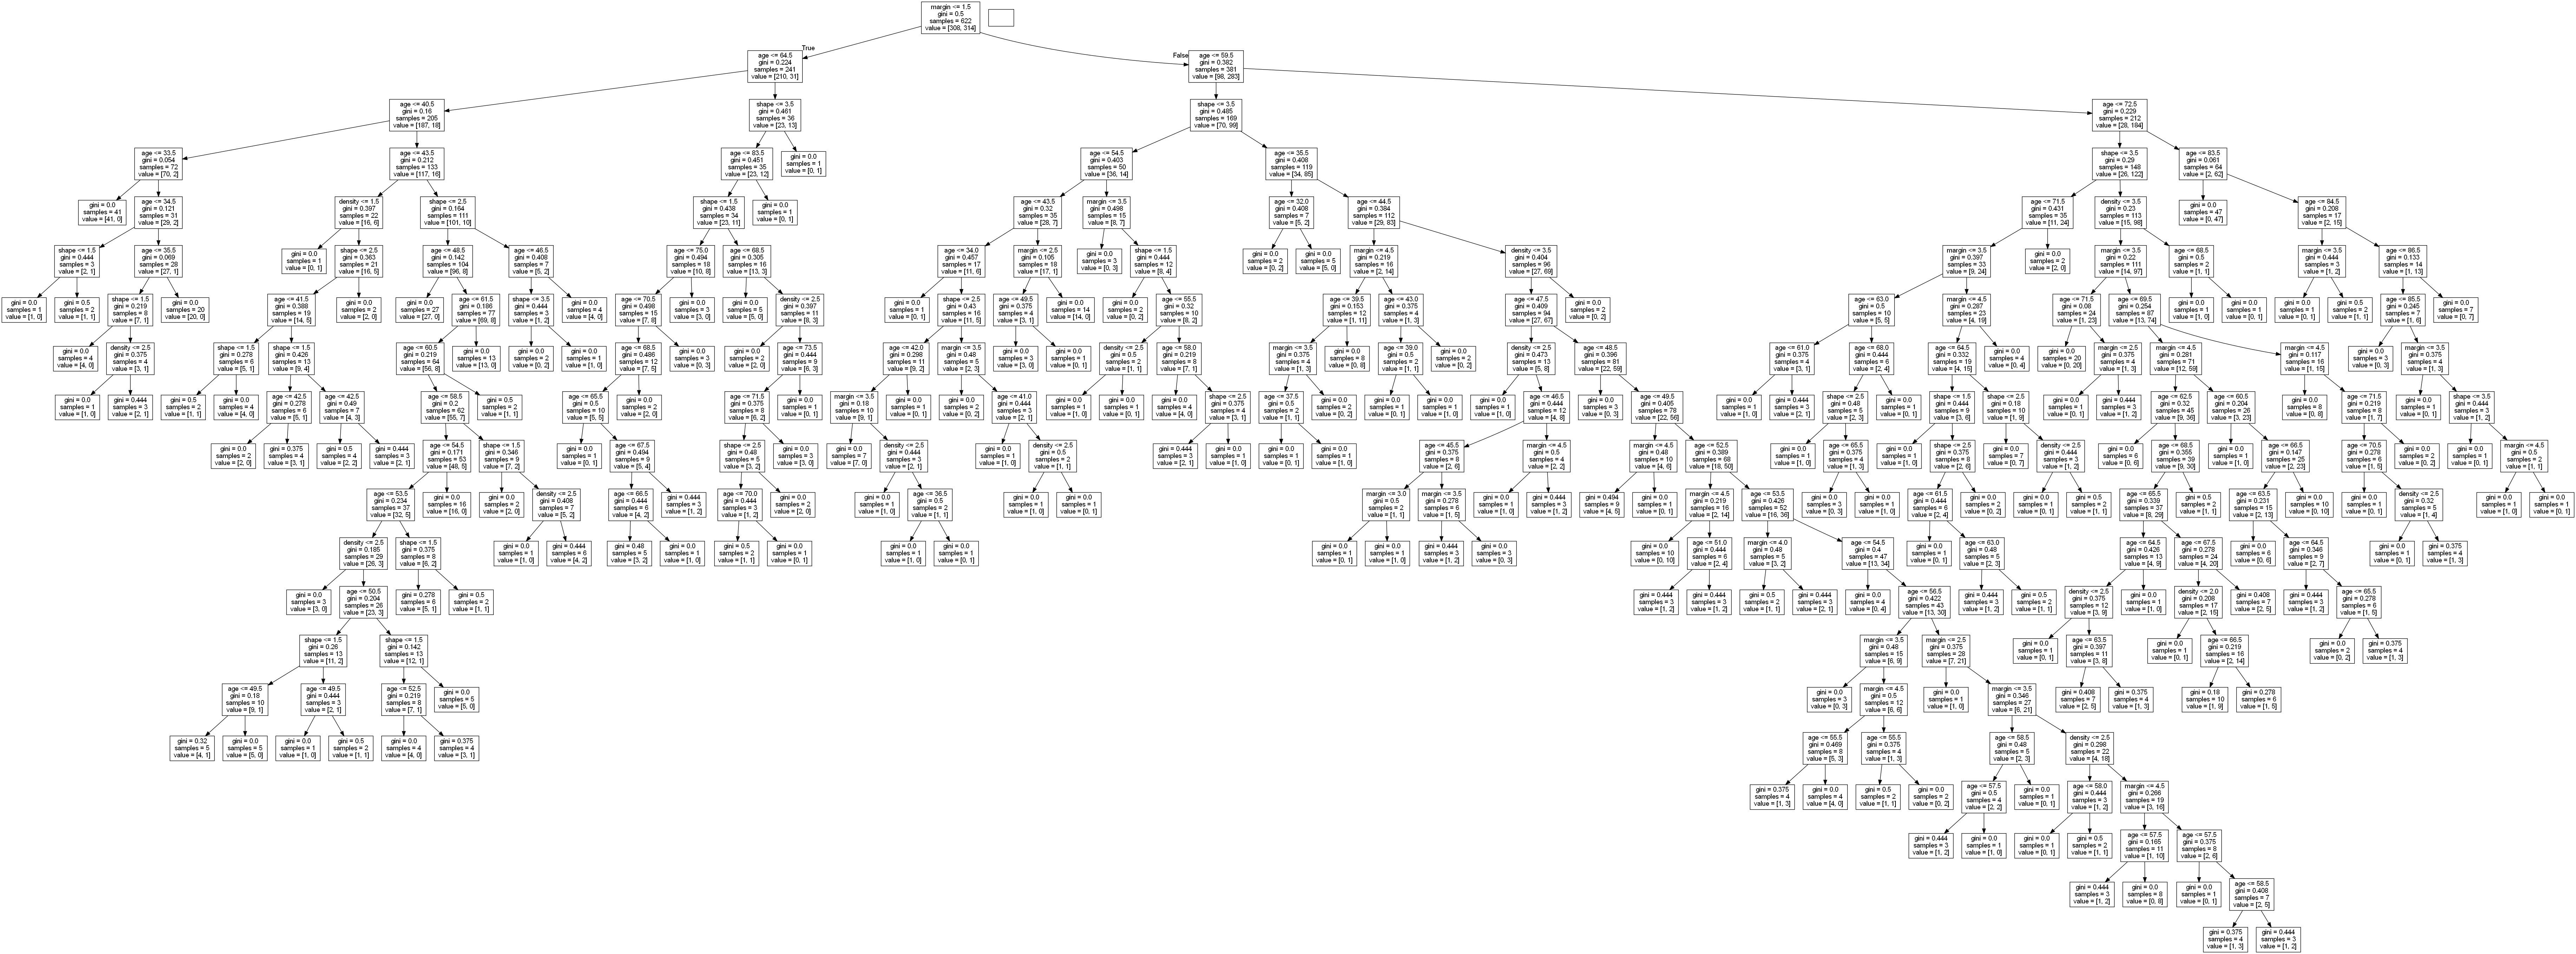

In [11]:
from IPython.display import Image
from sklearn import tree
from six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=['age', 'shape', 'margin', 'density'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

image_data = bytes(graph.create_png())
Image(image_data)


Measure the accuracy of the resulting decision tree model using my test data.

In [12]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test) # predict the classes of the testing data
accuracy_score(y_test, y_pred) # calculate the accuracy of the classifier

0.7403846153846154

I will use K-Fold cross validation to get a better measure of my alogrithm's accuracy (K=10)

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10) # cross validate the classifier
print(scores) # print the cross validated scores
print(scores.mean()) # print the mean of the cross validated scores

[0.73493976 0.75903614 0.72289157 0.75903614 0.78313253 0.71084337
 0.73493976 0.75903614 0.77108434 0.6746988 ]
0.7409638554216867


 ## RandomForestClassifier 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Assuming X and y are your dataset and target variable
imputer = SimpleImputer(strategy='mean') # create a simple imputer
X = imputer.fit_transform(X) 

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(clf_rf, X, y, cv=10) 
cv_scores_mean = cv_scores.mean()

# Fit the Random Forest Classifier to your data (if needed)
clf_rf.fit(X, y)


print("Mean Cross-Validated Accuracy:", cv_scores_mean)

Mean Cross-Validated Accuracy: 0.7662650602409639


## SVM

Next using svm.SVC with a linear kernel.

In [15]:
print("Dimensions of X:", X.shape)
print("Dimensions of y:", y.shape)

Dimensions of X: (830, 4)
Dimensions of y: (830,)


In [16]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Assuming X_train and y_train are your training data
clf = svm.SVC(kernel='linear')

# Fit the SVM classifier to your training data
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
cv_scores = cross_val_score(clf, X, y, cv=10)

cv_scores.mean()

0.7987951807228917

## KNN
How about K-Nearest-Neighbors? Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on my particular data set.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

neigh = KNeighborsClassifier(n_neighbors=14)
cv_scores = cross_val_score(neigh, X, y, cv=10)
cv_scores.mean()

0.7819277108433735

Choosing K is tricky, so I can't discard KNN until I've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance I can get out of KNN.

In [19]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, X, y, cv=10)
    print(n,cv_scores.mean())

1 0.7385542168674698
2 0.6927710843373495
3 0.7674698795180722
4 0.7506024096385542
5 0.772289156626506
6 0.7795180722891566
7 0.7891566265060241
8 0.7686746987951808
9 0.7843373493975904
10 0.7783132530120482
11 0.7771084337349398
12 0.7746987951807228
13 0.7759036144578313
14 0.7819277108433735
15 0.7843373493975904
16 0.7843373493975904
17 0.7819277108433735
18 0.7746987951807229
19 0.7831325301204819
20 0.7783132530120482
21 0.7819277108433734
22 0.7819277108433734
23 0.7759036144578314
24 0.7795180722891567
25 0.7783132530120482
26 0.7843373493975903
27 0.7843373493975904
28 0.780722891566265
29 0.7795180722891566
30 0.7771084337349399
31 0.7831325301204818
32 0.7771084337349398
33 0.7843373493975904
34 0.7759036144578314
35 0.7771084337349399
36 0.7807228915662651
37 0.7819277108433735
38 0.7855421686746987
39 0.7819277108433735
40 0.7783132530120482
41 0.7819277108433733
42 0.7807228915662651
43 0.780722891566265
44 0.7795180722891566
45 0.7746987951807229
46 0.7759036144578314


## Naive Bayes

Try naive_bayes.MultinomialNB. How does its accuracy stack up?

In [20]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
accuracy = clf_nb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.75


## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." I will try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. poly kernel is the best performing kernel. 

In [21]:
clf = svm.SVC(kernel='poly')
clf.fit(X, y)
cv_scores = cross_val_score(clf, X, y, cv=10)
cv_scores_mean = cv_scores.mean()
print("Mean Cross-Validated Accuracy:", cv_scores_mean)

Mean Cross-Validated Accuracy: 0.7879518072289157


## Logistic Regression
I will try Logisitic Regression next.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf_lr = LogisticRegression(random_state=42)

# Fit the Logistic Regression model to your data
clf_lr.fit(X, y)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(clf_lr, X, y, cv=10)

# Compute the mean of cross-validated scores
cv_scores_mean = cv_scores.mean()

# Print the mean accuracy
print("Mean Cross-Validated Accuracy:", cv_scores_mean)


Mean Cross-Validated Accuracy: 0.8072289156626505


## Neural Networks
I will use Keras to set up a neural network with 1 binary output neuron and see how it performs then run a large number of epochs to train the model.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu')) # add a second hidden layer
model.add(Dense(1, activation='sigmoid')) # add a output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=5)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/50
125/125 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5756
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6576
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7219
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.7315
Epoch 5/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.7685
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.7749
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7669
Epoch 8/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.7444
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.7637
Epoch 10/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7990

In [29]:
import pickle

# Define the directory where you want to save the model
directory = 'C:\\Users\\Imahv\\MLCourse'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to the pickle file in your desired directory
pickle_file_path = os.path.join(directory, 'logistic_regression_model.pkl')

# Save the Logistic Regression model to the pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(clf_lr, f)

print(f"Logistic Regression model saved to {pickle_file_path}")


Logistic Regression model saved to C:\Users\Imahv\MLCourse\logistic_regression_model.pkl


In [31]:
import pickle
import numpy as np

directory = 'C:\\Users\\Imahv\\MLCourse'

pickle_file_path = os.path.join(directory, 'logistic_regression_model.pkl')

# Load the Logistic Regression model from the pickle file
with open(pickle_file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Input features (age, shape, margin, density)
age = 54
shape = 1  
margin = 2  
density = 1  


input_data = np.array([[age, shape, margin, density]])

# Make a prediction using the loaded model
prediction = loaded_model.predict(input_data)

# Display the result
if prediction == 0:
    print("The cancer severity is benign.")
else:
    print("The cancer severity is malignant.")


The cancer severity is benign.
